# Dark matter spike density profile example.
## Author : Abram Pérez Herrero
### Date : 12/06/2022

In [13]:
import DMspikes as dms
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
import matplotlib as mpl
mpl.rcParams['xtick.top'] = False
mpl.rcParams['ytick.right'] =False

We want to compute the dark matter density spike considering three different initial density profile models. For that purpose, we have considered the Milky Way parameters, i.e., a black hole mass of $M_{BH}=4\cdot 10^{6}\:\rm{M_\odot}$, a DM halo mass of $M_{H}=10^{12}\:\rm{M_\odot}$. The scale parameter that they considered for a Herquist model is $a=20\:\rm{kpc}$. 

In the case of the Power-law model, we can consider the same value. However, to converge the models in small radii, we have to change it in the case of the super-Navarro-Frenk-White model as $b= 15\:\rm{kpc}$ and $M_{H}=1.5\cdot 10^{12}\:\rm{M_\odot}$. 

In [2]:
# Create the objects
a = 20
M_halo = 1e12
M_bh = 4e6
gamma = 1
power_law = dms.dm_spike(M_halo,M_bh,a,6,75,'Power-law',gamma)
snfw = dms.dm_spike(M_halo*1.5,M_bh,a*3/4,6,75,'sNFW')
hernquist = dms.dm_spike(M_halo,M_bh,a,6,75,'Hernquist')

Once we have created the object, we can plot the initial density profile considered to see that its converge at small radii.

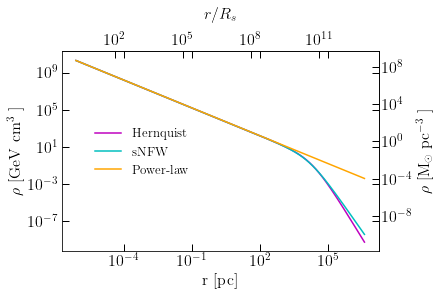

In [5]:
r = np.geomspace(2,1e13,10000)

dens_pw = power_law.initial_density(r)
dens_sn = snfw.initial_density(r)
dens_he = hernquist.initial_density(r)

fig, ax1 = plt.subplots(constrained_layout=True)

ax1.plot(r*hernquist.Rs.to('pc'),dens_he,'m',label=r'Hernquist')
ax1.plot(r*snfw.Rs.to('pc'),dens_sn,'c',label=r'sNFW')
ax1.plot(r*power_law.Rs.to('pc'),dens_pw,'orange',label=r'Power-law')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$\rho$ [GeV cm$^{-3}$ ]')


def forward(r):
    
    return r/hernquist.Rs.to('pc').value
def inverse(r):
    
    return r/hernquist.Rs.to('pc').value

secax = ax1.secondary_xaxis('top', functions=(forward,inverse))
secax.set_xlabel(r'$r/R_s$',labelpad=15)

def forward1(r):
    de = r*u.GeV/u.cm**3
    return (de/const.c**2).to('M_sun/pc^3').value
def inverse1(r):
    de = r*u.M_sun/u.pc**3
    return (de*const.c**2).to('GeV/cm^3').value

secay = ax1.secondary_yaxis('right', functions=(forward1,inverse1))
secay.set_ylabel(r'$\rho$ [$\rm{M_\odot \: pc^{-3}}$ ]')

ax1.set_xlabel(r'r [pc]')
ax1.set_ylabel(r'$\rho$ [GeV cm$^3$ ]')
ax1.legend(frameon=False, loc=[0.09,0.35],markerscale=0.1,fontsize=13,ncol=1)

#plt.savefig('./plots/DM_initial_density_comparison.pdf')

We can compute also the dark matter spike density profile. For speed, whenever you have more than one processor, it is recommended that you use. If you don't want to run it, go to the next cell.

In [ ]:
r = np.concatenate((np.geomspace(4,15,8),np.geomspace(20,80,3),np.geomspace(1e2,1e3,3)
                  ,np.geomspace(5e3,1e4,3),np.geomspace(5e4,1e5,3),np.geomspace(5e5,1e6,3)
                    ,np.geomspace(5e6,1e7,3),np.geomspace(5e7,1e8,3)))

hernquist.spike_density_profile(r,True)
snfw.spike_density_profile(r,True)
power_law.spike_density_profile(r,True)

We can save our results in a txt as

In [8]:
# Save the data in a txt.
power_law.save_txt_density('./listfile/')
snfw.save_txt_density('./listfile/')
hernquist.save_txt_density('./listfile/')

We can read data from a txt file, with the appropriate format.

In [9]:
power_law.read_spike_density('./listfile/','Density_Power-law_6.6020599913279625_20.0_12.0_.txt')
snfw.read_spike_density('./listfile/','Density_sNFW_6.6020599913279625_15.000000000000002_12.176091259055681_.txt')
hernquist.read_spike_density('./listfile/','Density_Hernquist_6.6020599913279625_20.0_12.0_.txt')

[array([0.00000000e+00, 8.36931823e+17, 2.62013940e+18, 3.90904924e+18,
        4.27984815e+18, 3.95937190e+18, 3.30253643e+18, 2.57284437e+18,
        1.61398750e+18, 4.16830401e+17, 9.27173979e+16, 5.62845959e+16,
        4.05849247e+15, 2.81340095e+14, 6.62370062e+12, 2.95197128e+12,
        1.31542253e+12, 3.07948756e+10, 1.37187615e+10, 6.11148954e+09,
        1.43009639e+08, 6.37089387e+07, 2.83817282e+07, 6.64295241e+05,
        2.95959969e+05, 1.31860168e+05, 7.86899700e+02, 5.55761510e+02,
        3.92323390e+02]),
 array([4.00000000e+00, 4.83131000e+00, 5.83538000e+00, 7.04812000e+00,
        8.51291000e+00, 1.02821100e+01, 1.24190000e+01, 1.50000000e+01,
        2.00000000e+01, 4.00000000e+01, 8.00000000e+01, 1.00000000e+02,
        3.16227770e+02, 1.00000000e+03, 5.00000000e+03, 7.07106781e+03,
        1.00000000e+04, 5.00000000e+04, 7.07106781e+04, 1.00000000e+05,
        5.00000000e+05, 7.07106781e+05, 1.00000000e+06, 5.00000000e+06,
        7.07106781e+06, 1.00000000e+07

In this plot, we can see the results. But first, we will calculate the radius of influence of the black hole or the spike radius.

In [29]:
hernquist.break_radius()
print(r'Radius of the spike in Rs units, r_h =',hernquist.r_h*0.2/1e7,'10^7')

Radius of the spike in Rs units, r_h = 2.9636398489076363 10^7


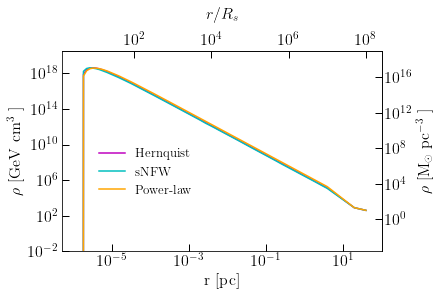

In [15]:


dens_pw = power_law.spike_density
dens_sn = snfw.spike_density
dens_he = hernquist.spike_density

fig, ax1 = plt.subplots(constrained_layout=True)

ax1.plot(r*hernquist.Rs.to('pc'),dens_he,'m',label=r'Hernquist')
ax1.plot(r*snfw.Rs.to('pc'),dens_sn,'c',label=r'sNFW')
ax1.plot(r*power_law.Rs.to('pc'),dens_pw,'orange',label=r'Power-law')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$\rho$ [GeV cm$^{-3}$ ]')


ax1.set(xlim=(5e-7,100), ylim=(1e-2,3e20))

def forward(r):
    
    return r/hernquist.Rs.to('pc').value
def inverse(r):
    
    return r/hernquist.Rs.to('pc').value

secax = ax1.secondary_xaxis('top', functions=(forward,inverse))
secax.set_xlabel(r'$r/R_s$',labelpad=15)

def forward1(r):
    de = r*u.GeV/u.cm**3
    return (de/const.c**2).to('M_sun/pc^3').value
def inverse1(r):
    de = r*u.M_sun/u.pc**3
    return (de*const.c**2).to('GeV/cm^3').value

secay = ax1.secondary_yaxis('right', functions=(forward1,inverse1))
secay.set_ylabel(r'$\rho$ [$\rm{M_\odot \: pc^{-3}}$ ]')


ax1.set_xlabel(r'r [pc]')
ax1.set_ylabel(r'$\rho$ [GeV cm$^3$ ]')
ax1.legend(frameon=False, loc=[0.1,0.25],markerscale=0.1,fontsize=13,ncol=1)


If we consider that dark matter particles can self-annihilate, have a mass $m_\chi=100$ GeV, and a cross-section $\sigma v\sim 3\cdot10^{-26}$ cm$^{3}$ s$^{-1}$. The dark matter spike after a time of $t_{BH}\sim 10$ Myr, decrese their central density. We can use it only on Hernquist's to compare with the rest.

In [33]:
m_x = 100
cross_section = 3e-26
t_bh = (10*u.Myr).to('s').value
hernquist.spike_annihilation(m_x,cross_section,t_bh)

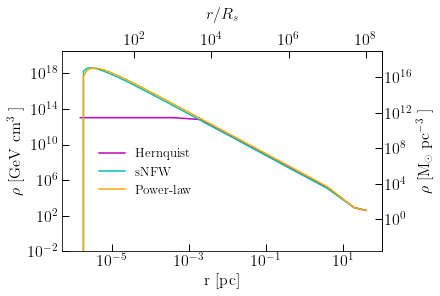

In [34]:


dens_pw = power_law.spike_density
dens_sn = snfw.spike_density
dens_he = hernquist.spike_density

fig, ax1 = plt.subplots(constrained_layout=True)

ax1.plot(r*hernquist.Rs.to('pc'),dens_he,'m',label=r'Hernquist')
ax1.plot(r*snfw.Rs.to('pc'),dens_sn,'c',label=r'sNFW')
ax1.plot(r*power_law.Rs.to('pc'),dens_pw,'orange',label=r'Power-law')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$\rho$ [GeV cm$^{-3}$ ]')


ax1.set(xlim=(5e-7,100), ylim=(1e-2,3e20))

def forward(r):
    
    return r/hernquist.Rs.to('pc').value
def inverse(r):
    
    return r/hernquist.Rs.to('pc').value

secax = ax1.secondary_xaxis('top', functions=(forward,inverse))
secax.set_xlabel(r'$r/R_s$',labelpad=15)

def forward1(r):
    de = r*u.GeV/u.cm**3
    return (de/const.c**2).to('M_sun/pc^3').value
def inverse1(r):
    de = r*u.M_sun/u.pc**3
    return (de*const.c**2).to('GeV/cm^3').value

secay = ax1.secondary_yaxis('right', functions=(forward1,inverse1))
secay.set_ylabel(r'$\rho$ [$\rm{M_\odot \: pc^{-3}}$ ]')


ax1.set_xlabel(r'r [pc]')
ax1.set_ylabel(r'$\rho$ [GeV cm$^3$ ]')
ax1.legend(frameon=False, loc=[0.1,0.25],markerscale=0.1,fontsize=13,ncol=1)
